C:\Users\27983\AppData\Local\Temp/ipykernel_20508/2083546538.py:68: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  graph = plt.pcolormesh(


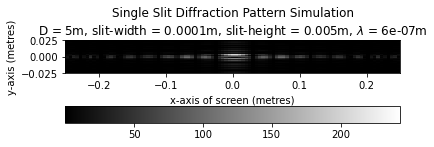

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
D = 5           # distance of screen

slitWidth = 0.0001

slitHeight = 0.005
# amplitude/intensity

a = 1
# wavelength

w = 0.0000006  

x1 = -0.25     
# assuming screen is a rectangle from (x1,y1) to (x2,y2)

x2 = 0.25

y1 = -0.025

y2 = 0.025
# linear resolution (no. of points per unit length)

lres = 2000 
 
 
# PERFORMING CALCULATIONS
# calculations are performed using numpy arrays and array methods

m, n = int((x2-x1)*lres), int((y2-y1)*lres)
 
# Obtaining sample points on the screen -
# X, Y and Z are mxn 2d arrays containing x coordinates, y coordinates
# and z coordinates of the screen sample-points respectively.

X = np.linspace(x1, x2, n)

Y = np.linspace(y1, y2, m)

X, Y = np.meshgrid(X, Y)

Z = np.ones((m, n))*D
 
 
# Dividing the slit into sample points
X, Y = np.meshgrid(np.linspace(x1, x2, n), np.linspace(y1, y2, m))
Z = np.ones((m, n)) * D
xcoords = np.linspace(-slitWidth/2, slitWidth/2, 20)
ycoords = np.linspace(-slitHeight/2, slitHeight/2, 100)
xcoords_mesh, ycoords_mesh = np.meshgrid(xcoords, ycoords)
L = np.sqrt((X[:,:,None,None] - xcoords_mesh[None,None,:,:])**2 + 
            (Y[:,:,None,None] - ycoords_mesh[None,None,:,:])**2 + 
            Z[:,:,None,None]**2)
theta = (L/w) * 2 * np.pi
A = np.sum(np.sin(theta), axis=(2,3))

A = np.abs(A)
 
#plotting
ax = plt.axes()
ax.set_aspect('equal')
plt.rc('text', usetex=False) 
plt.title("Single Slit Diffraction Pattern Simulation\nD = {}m, slit-width = {}m, slit-height = {}m, $\lambda$ = {}m".format(D, slitWidth, slitHeight, w))
plt.xlabel("x-axis of screen (metres)")
plt.ylabel("y-axis (metres)")
graph = plt.pcolormesh(
    X, Y, A, cmap=matplotlib.colors.LinearSegmentedColormap.from_list("", ['black', 'white']))
plt.colorbar(graph, orientation='horizontal')
plt.show()
 